In [1]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
df_multi_df_list_p = {}
df_multi_df_list_n = {}

# file_path = '../thesis_data/arne_03_05/logs_arne_real_03_05_tt1'
# graph_file = "graph/arne_real_03_05_tt1_eye.json"
# file_path = '../thesis_data/arne_03_05/logs_arne_imag_03_05_tt3'
# graph_file = "graph/arne_imag_03_05_tt3_eye.json"
# file_path = '../thesis_data/ly_04_07/logs_ly_real_01'
# graph_file = "graph/ly_real_01_eye.json"
# file_path = '../thesis_data/ly_04_07/logs_ly_real_02'
# graph_file = "graph/ly_real_02_eye.json"
# file_path = '../thesis_data/ly_04_07/logs_ly_imag_01'
# graph_file = "graph/ly_imag_01_eye.json"
# file_path = '../thesis_data/ly_04_07/logs_ly_imag_03'
# graph_file = "graph/ly_imag_03_eye.json"
# file_path = '../thesis_data/ece_04_07/logs_ece_real_02'
# graph_file = "graph/ece_real_02_eye.json"
# file_path = '../thesis_data/qiang_23_07/logs_qiang_real_01'
# graph_file = "graph/qiang_real_01_eye.json"
file_path = '../thesis_data/qiang_23_07/logs_qiang_imag_01'
graph_file = "graph/qiang_imag_01_eye.json"

for m in range(1,11):
    ignore_events_threshold = m*0.2
    df_list_p = []
    df_list_n = []
    for i in range(1,26):
        # Read the CSV file into a DataFrame
#         file_path = '../thesis_data/arne_03_05/logs_arne_real_03_05_tt1/log'+str(i)+'.txt'
#         file_path = '../thesis_data/arne_03_05/logs_arne_imag_03_05_tt3/log'+str(i)+'.txt'
#         file_path = '../thesis_data/ly_04_07/logs_ly_real_01/log'+str(i)+'.txt'
#         file_path = '../thesis_data/ly_04_07/logs_ly_real_02/log'+str(i)+'.txt'
#         file_path = '../thesis_data/ly_04_07/logs_ly_imag_01/log'+str(i)+'.txt'
#         file_path = '../thesis_data/ly_04_07/logs_ly_imag_03/log'+str(i)+'.txt'
#         file_path = '../thesis_data/ece_04_07/logs_ece_real_02/log'+str(i)+'.txt'

        file_full_path = file_path+'/log'+str(i)+'.txt'
        df = pd.read_csv(file_full_path, sep='\t')

        # Column to check for changes
        column_to_check = 'Gazing'

        # Filter rows where the column value changes
        df_filtered = df[df[column_to_check] != df[column_to_check].shift()].copy()

        print("\nFiltered DataFrame:")
        print(df_filtered)
        def is_integer_trial(row):
            try:
                int_value = int(row['Trial'])
                return True
            except ValueError:
                return False

        df_filtered['gazing_time'] = df_filtered['Time'].shift(-1) - df_filtered['Time']
        df_filtered_2 = df_filtered[df_filtered.apply(lambda row: is_integer_trial(row),axis=1)].copy()
        df_filtered_3 = df_filtered_2[df_filtered_2['Gazing']!='0'].copy()
        df_filtered_final_p = df_filtered_3[df_filtered_3.apply(lambda row: float(row['gazing_time'])>=ignore_events_threshold,axis=1)].copy()
        df_filtered_final_n = df_filtered_3[df_filtered_3.apply(lambda row: float(row['gazing_time'])<ignore_events_threshold,axis=1)].copy()


        df_list_p.append(df_filtered_final_p)
        df_list_n.append(df_filtered_final_n)
        
    df_multi_df_list_p[str(ignore_events_threshold)]=df_list_p
    df_multi_df_list_n[str(ignore_events_threshold)]=df_list_n



Filtered DataFrame:
          Time                GazeX                GazeY Trial Target Gazing
0    61.346237                   xx                   xx    xx     xx     xx
1    62.571532   341.84675216674805   -836.8520450592041     1     12      0
21   64.254691   -26.72321319580078   -421.0069878101349     1     12      3
23   64.398898   -149.2312717437744  -327.70697486400604     1     12      0
24   64.468367    -218.147234916687   -267.3366050720215     1     12      1
33   65.121226   -418.7789497375488  -234.14445519447327     1     12      0
36   65.347270   -495.2912063598633   -74.17331886291504     1     12     12
37   65.423293  -481.05418968200684   -4.099972128868103     1     12      0
38   65.497858  -395.44973945617676    68.49234545230865     1     12      4
41   65.712459   -72.16455745697021   217.44010484218597     1     12      9
43   65.862649   155.46614742279053   150.91599655151367     1     12      0
44   65.937982    269.8264446258545   129.6767860651016


Filtered DataFrame:
           Time                GazeX                GazeY Trial Target Gazing
0    122.891150                   xx                   xx    xx     xx     xx
1    122.896019    72.38019561767578    306.3202584385872     7     16      0
5    123.185542   44.514278411865234    259.3147471547127     7     16      4
13   123.878174  -1.2549705505371094   282.45911206305027     7     16      0
17   124.169464  -255.39104747772217   248.39975626766682     7     16      9
20   124.377676   -471.5137996673584   217.49768932163715     7     16      0
21   124.483497   -523.1380634307861   188.67432041466236     7     16     15
25   124.785962   -433.6921691894531    37.07846796512604     7     16      0
32   125.286501    78.13007926940918   10.796262502670288     7     16      6
33   125.358108    147.2907371520996   18.175930380821228     7     16      0
36   125.573243   229.45449829101562    2.158868193626404     7     16     11
43   126.109501   255.51459503173828  -252.


Filtered DataFrame:
           Time                GazeX                GazeY Trial Target Gazing
0    176.347102                   xx                   xx    xx     xx     xx
1    176.353280   20.124813079833984    291.4806527495384    11     14      0
6    176.706386    37.88215255737305    248.8704650402069    11     14      3
13   177.217684   149.98782348632812   171.23149287700653    11     14      0
14   177.290827   198.15425491333008   134.61917889118195    11     14     16
18   177.571591   429.35762786865234    35.84007275104523    11     14      0
20   177.718175    512.8108406066895   -9.271674513816833    11     14     12
26   178.117591    467.6573295593262   -96.86602699756622    11     14      0
27   178.184468    383.8930835723877  -119.74052774906158    11     14      6
30   178.387823   127.52328300476074  -206.57071459293365    11     14      0
31   178.456118    17.88457489013672  -252.91509246826172    11     14     14
33   178.598337  -150.42347717285156  -305.


Filtered DataFrame:
           Time                GazeX                GazeY Trial Target Gazing
0    264.652853                   xx                   xx    xx     xx     xx
1    264.658437    87.17001342773438    296.4832600951195    19      5      0
7    265.106468   17.973867416381836   262.31064319610596    19      5      1
13   265.541764  -142.53085327148438   202.18334591388702    19      5      0
14   265.613443  -188.28381729125977   165.48077130317688    19      5      5
18   265.902359  -396.84025382995605     9.13444572687149    19      5     13
19   265.978939   -460.4480209350586   -60.12437152862549    19      5      0
32   266.929221   -501.9042663574219  -30.071827232837677    19      5      7
35   267.136456   -483.8534231185913  -223.01283985376358    19      5      0
40   267.474501  -380.25326442718506   -293.0652701854706    19      5      4
42   267.607922   -283.0842046737671  -222.20671105384827    19      5      0
43   267.681474  -231.39960479736328   -188


Filtered DataFrame:
         Time               GazeX                GazeY Trial Target Gazing
0   82.768293                  xx                   xx    xx     xx     xx
1   82.774910   87.25861358642578    270.8546065092087     3     11      0
2   82.840362   81.39468383789062   250.19555139541626     3     11      2
17  83.931469  -134.6222105026245   159.62235367298126     3     11      0
19  84.084453  -222.3898401260376      95.564990401268     3     11      1
21  84.227598  -326.9528703689575    4.679396867752075     3     11     15
23  84.357363  -459.4678144454956  -61.847086787223816     3     11      0
33  85.029703  -491.0514965057373   -82.17996382713318     3     11     12
39  85.442612  -564.7357206344604   13.028834581375122     3     11      0
41  85.593507  -594.2606763839722    37.98217821121216     3     11     11
42  85.666834  -603.0176553726196    34.31060528755188     3     11      0
43  85.741851  -617.3066883087158    48.73290002346039     3     11     11
72  

In [3]:
def print_object_attributes(obj):
    if isinstance(obj, dict):
        for key, value in obj.items():
            print(f"{key}: {value}")
    else:
        for attr in dir(obj):
            if not attr.startswith('__') and not attr.endswith('__'):
                value = getattr(obj, attr)
                print(f"{attr}: {value}")

print_object_attributes(df_multi_df_list_p)

0.2: [         Time                GazeX                GazeY Trial Target Gazing  \
24  64.468367    -218.147234916687   -267.3366050720215     1     12      1   
38  65.497858  -395.44973945617676    68.49234545230865     1     12      4   
58  66.984320  -248.46231937408447  -125.38941764831543     1     12     10   
68  67.728114   -660.1570329666138   -179.3601987361908     1     12     12   
73  68.074641   -707.4714760780334   -85.38671851158142     1     12     12   
90  69.234092    -637.996973991394  -192.26637053489685     1     12     12   

    gazing_time  
24     0.652860  
38     0.214601  
58     0.222944  
68     0.204223  
73     1.090730  
90     2.127005  ,          Time               GazeX               GazeY Trial Target Gazing  \
3   74.121479  3.4697914123535156    254.095072388649     2      2      6   
12  74.747852  208.84107971191406  216.30856722593307     2      2      2   
29  76.030500   324.2494583129883   45.64841866493225     2      2      2   
45  7

1.2000000000000002: [         Time              GazeX                GazeY Trial Target Gazing  \
90  69.234092  -637.996973991394  -192.26637053489685     1     12     12   

    gazing_time  
90     2.127005  ,          Time               GazeX             GazeY Trial Target Gazing  \
56  77.995714  312.30671310424805  49.0748108625412     2      2      2   

    gazing_time  
56     2.069852  ,          Time               GazeX              GazeY Trial Target Gazing  \
43  85.741851  -617.3066883087158  48.73290002346039     3     11     11   

    gazing_time  
43     2.091595  ,          Time             GazeX              GazeY Trial Target Gazing  \
85  96.165267  607.188777923584  48.65381455421448     4     16     16   

    gazing_time  
85     2.083659  ,           Time               GazeX              GazeY Trial Target Gazing  \
62  105.346294  -575.2213253974915  40.05524039268494     5     15     15   

    gazing_time  
62     2.068849  ,           Time              Gaz

In [4]:
def count_p(df_list_p):
    count_true_positive = 0
    count_false_positive = 0
    for df in df_list_p:
        c_tp = len(df[df.apply(lambda row: float(row['Target'])==float(row['Gazing']),axis=1)])
        c_fp = len(df[df.apply(lambda row: float(row['Target'])!=float(row['Gazing']),axis=1)])
        count_true_positive+= c_tp
        count_false_positive+= c_fp
    return count_true_positive,count_false_positive

def count_n(df_list_n):
    count_true_negative = 0
    count_false_negative = 0
    for df in df_list_n:
        c_tn = len(df[df.apply(lambda row: float(row['Target'])!=float(row['Gazing']),axis=1)])
        c_fn = len(df[df.apply(lambda row: float(row['Target'])==float(row['Gazing']),axis=1)])
        count_true_negative+= c_tn
        count_false_negative+= c_fn
    return count_true_negative,count_false_negative

data_for_graph = {
    "Dwelltime":[],
    "count_true_positive":[],
    "count_false_positive":[],
    "count_true_negative":[],
    "count_false_negative":[],
    "sum_true_pos":[],
    "sum_false_pos":[],
    "sum_true_neg":[],
    "sum_false_neg":[]
    
}
for m in range(1,11):
    ignore_events_threshold = m*0.2
    count_true_positive,count_false_positive = count_p(df_multi_df_list_p[str(ignore_events_threshold)])
    count_true_negative,count_false_negative = count_n(df_multi_df_list_n[str(ignore_events_threshold)])
    data_for_graph["Dwelltime"].append(str(round(ignore_events_threshold,2)))
    if(count_true_positive==0): # positive precision
        data_for_graph["count_true_positive"].append(0)
    else:
        data_for_graph["count_true_positive"].append((count_true_positive/(count_true_positive+count_false_positive)))
        
        
    if(count_true_positive==0):
        data_for_graph["count_false_positive"].append(0)
    else:
        data_for_graph["count_false_positive"].append((count_true_positive/(count_true_positive+count_false_negative)))
        
        
    if(count_true_negative==0): # negative precision
        data_for_graph["count_true_negative"].append(0)
    else:
        data_for_graph["count_true_negative"].append((count_true_negative/(count_true_negative+count_false_negative)))
        
        
    if(count_true_negative==0):
        data_for_graph["count_false_negative"].append(0)
    else:
        data_for_graph["count_false_negative"].append((count_true_negative/(count_true_negative+count_false_positive)))
    
    data_for_graph["sum_true_pos"].append(count_true_positive) 
    data_for_graph["sum_false_pos"].append(count_false_positive) 
    data_for_graph["sum_true_neg"].append(count_true_negative) 
    data_for_graph["sum_false_neg"].append(count_false_negative) 



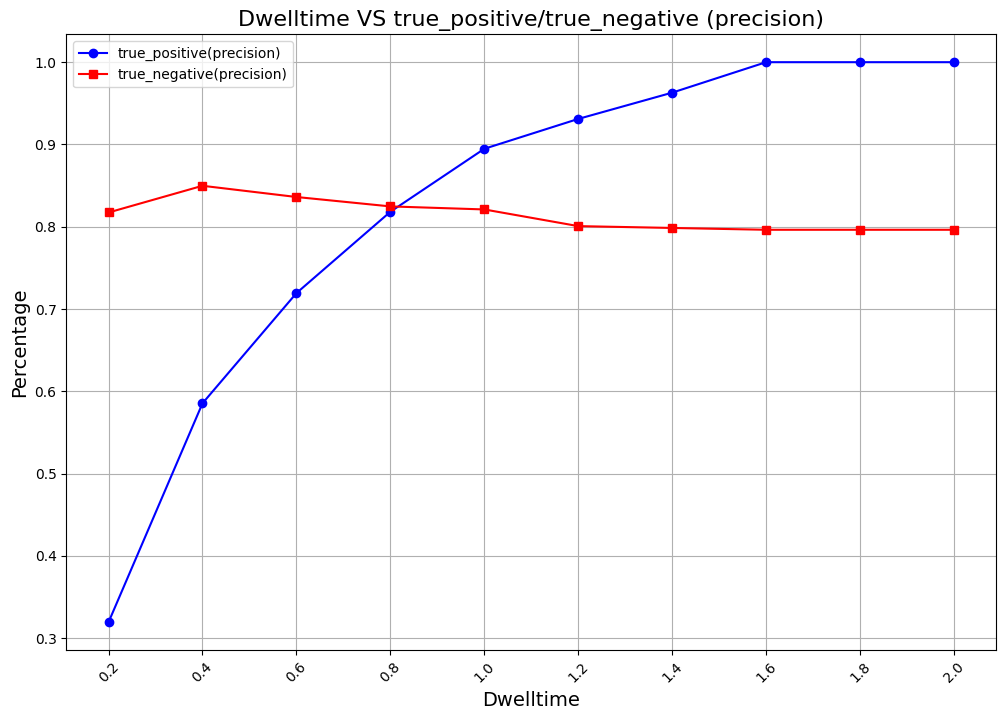

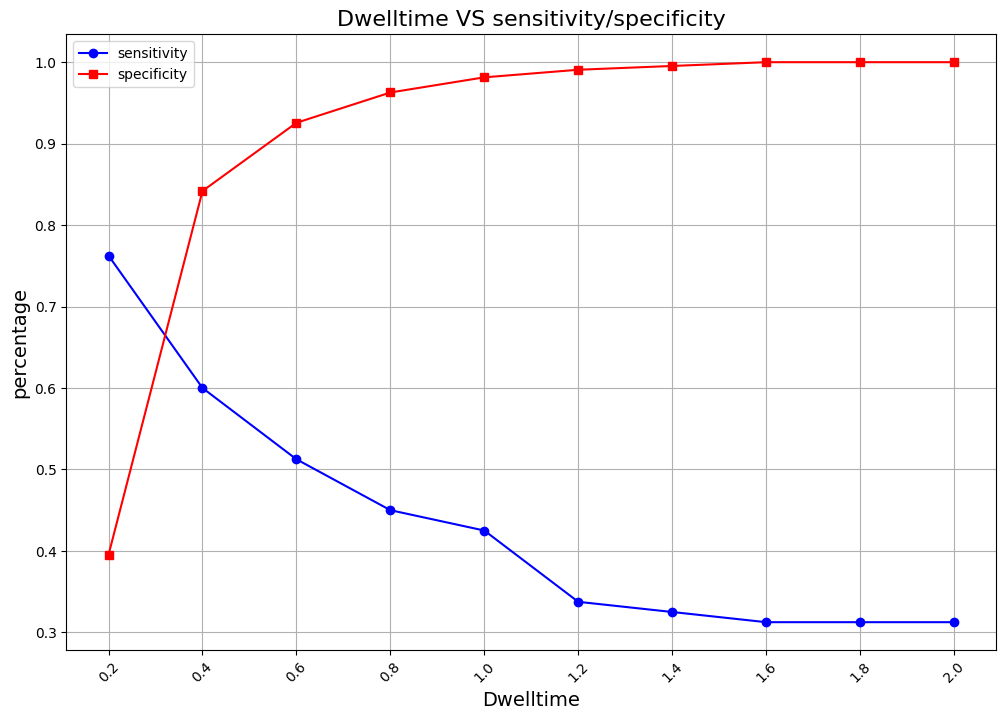

In [5]:
# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_true_positive"], marker='o', linestyle='-', color='b', label='true_positive(precision)')
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_true_negative"], marker='s', linestyle='-', color='r', label='true_negative(precision)')

# Adding titles and labels
plt.title('Dwelltime VS true_positive/true_negative (precision)', fontsize=16)
plt.xlabel('Dwelltime', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Displaying the chart
plt.show()

# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_false_positive"], marker='o', linestyle='-', color='b', label='sensitivity')
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_false_negative"], marker='s', linestyle='-', color='r', label='specificity')

# Adding titles and labels
plt.title('Dwelltime VS sensitivity/specificity', fontsize=16)
plt.xlabel('Dwelltime', fontsize=14)
plt.ylabel('percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Displaying the chart
plt.show()

In [6]:
# Specify the file name
file_name = 'eye_data_for_graph.json'

# Save the dictionary to a file
with open(file_name, 'w') as file:
    json.dump(data_for_graph, file)
    
# Save the dictionary to a file
with open(graph_file, 'w') as file:
    json.dump(data_for_graph, file)